## Unsupervised learning 

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle 
from sklearn.datasets import load_sample_image, load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

### Clustering 
- color quantilization using k-means 
- reduce the number of colors within an image while retaining image integrity 

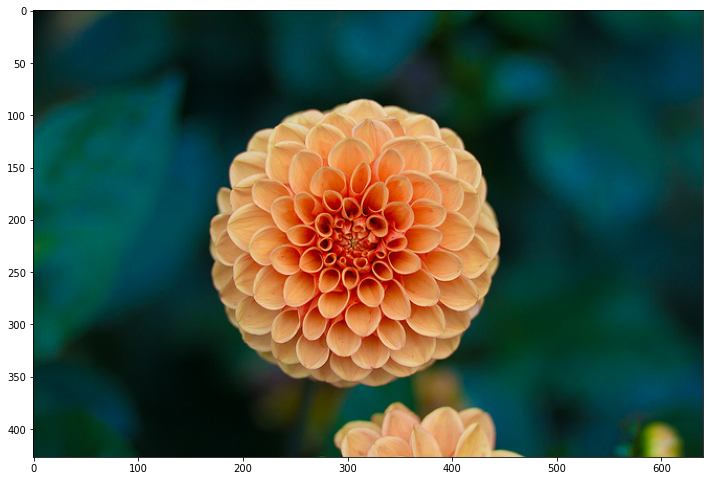

In [2]:
flower = load_sample_image('flower.jpg')

flower = np.array(flower, dtype = np.float64) / 255 
# normalizing data by converting into float and dividing by 255 (color is expressed as RGB)
plt.figure(figsize=(12,12))
plt.imshow(flower)

In [3]:
w, h, d = original_shape = tuple(flower.shape)

assert d == 3 
# RGB 

image_array = np.reshape(flower, (w*h, d))

In [11]:
image_sample = shuffle(image_array, random_state=42)[:1000]
# take first 1000 samples 

# fit k means 
n_colors = 64
## reducing the number of colors 
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

# get color indices for full image for reconstruction 
# labels are predictions from the kmeans 
labels = kmeans.predict(image_array)

In [7]:
def reconstruct_image(cluster_centers, labels, w, h): 
    d = cluster_centers.shape[1]
    # at index 1 
    image = np.zeros((w,h,d,))
    label_index = 0 
    for i in range(w): 
        for j in range(h): 
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1 
    return image 


Rebuild the image
- each pixel is assigned to a cluster 
- each cluster is corresponds to a specific color  

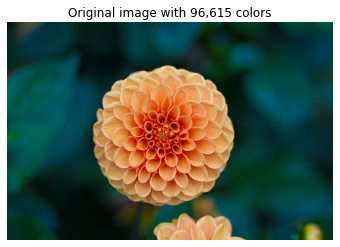

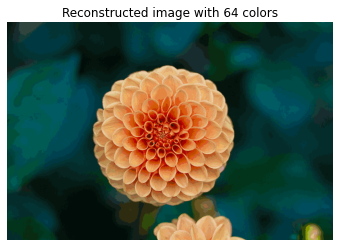

In [9]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96,615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))

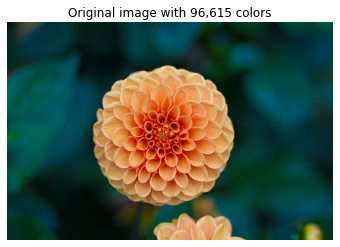

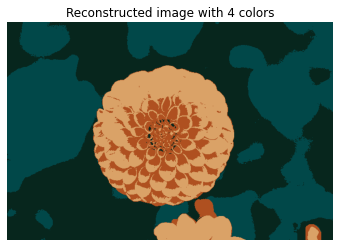

In [10]:
image_sample = shuffle(image_array, random_state=42)[:1000]
# take first 1000 samples 

# fit k means 
n_colors = 4
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

# get color indices for full image for reconstruction 
# labels are predictions from the kmeans 
labels = kmeans.predict(image_array)

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96,615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))

### Principal Component Analysis (PCA) 

In [13]:
iris = load_iris()
X = iris.data
y = iris.target 

target_names = iris.target_names 

In [15]:
pca = PCA(n_components=2)
# want a 2D plot 
X_r = pca.fit(X).transform(X)
print(f'Explained variance ratio from each principal component (PCA): {pca.explained_variance_ratio_ * 100}%')

Explained variance ratio from each principal component (PCA): [92.46187232  5.30664831]%


Total of 97% of the variance is explained with just two components (adding the two PCs) 

Text(0.5, 1.0, 'PCA of Iris Dataset')

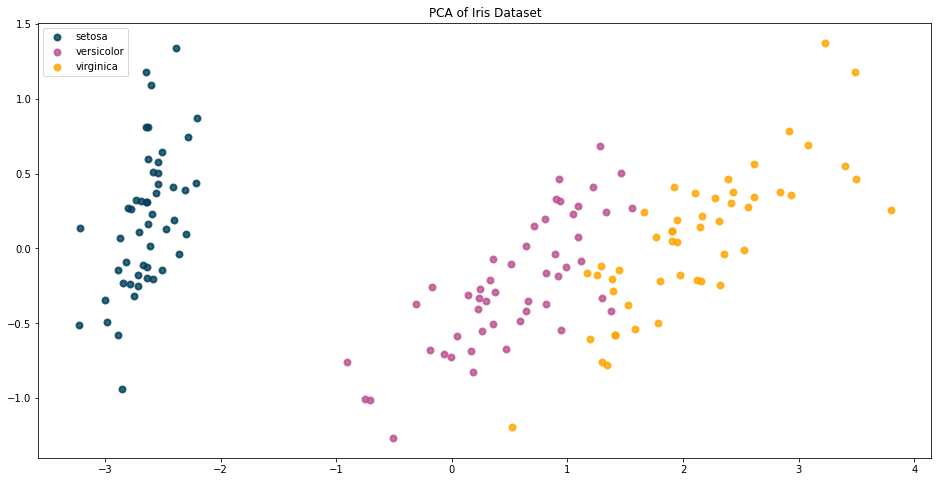

In [28]:
colors = ['#003f5c', '#bc5090', '#ffa600']
lw=2 
plt.figure(figsize = (16,8))

for color, i, target_name in zip(colors, [0,1,2], target_names): 
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color = color, alpha = 0.8, lw=lw, label = target_name)
plt.legend(loc='best', shadow = False, scatterpoints = 1) 
plt.title('PCA of Iris Dataset')

Visualizing a dataset that contains 4 features and 3 classes 
- can follow up with classifier (decision trees, etc) 